
# DC Measurements logbook

v0.2.5

### Student: דן קצוב-פייגין
### Station: 18
### Date: 21/04/2025

***

In [19]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression

<div dir=rtl>

## DC2 :  מחלק מתח

| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC2-5.png" width="150" > | $$V_{out} = V_{in} \frac{R_2}{R_1 + R_2}$$|


<div dir=rtl>
מדידת ערכי הנגדים שנבחרו להרכבת מחלק המתח (לא לשכוח הערכת שגיאה!):

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המנעו מלבחור נגדים של עשרות אוהם בודדים
</div>

In [60]:
R1 = 10.014*1000
R1_err = R1*.0005 + .008*10_000
R2 = 10.074*1000
R2_err = R2*.0005 + .008*10_000

R_ratio = R2 / (R1+R2)
from math import hypot
error = hypot(R1_err/R1, R2_err/R2)
# print(f"Error of theoretical calculation: {e:.3f}")
R1, R1_err, R2, R2_err, R_ratio

(10014.0, 85.007, 10074.0, 85.037, 0.5014934289127837)

<div dir=rtl>

האם הערכים המדודים הממוצעים (באמצעות meas) של $V_{in}$, $V_{out}$ מתאימים ליחס החלוקה המתוכנן?

10 (לפחות) מדידות של מתח הכניסה ($V_{in}$) בערוץ X ומתח המוצא ($V_{out}$) בערוץ Y:

In [58]:
# Your data here
V_in = np.array([0.7734,0.811,0.8797,1.422,1.6196,1.703,1.9026,2.081,2.1466,2.3901])
V_out = np.array([0.3764,0.376,0.4364,0.6971,0.8146,0.819,0.9612,1.0403,1.0860,1.2075])
# Your data here
V_in_err = .015 * V_in
V_out_err = .015 * V_out

<div dir=rtl>
<b> הצגת הנתונים: </b> <br>

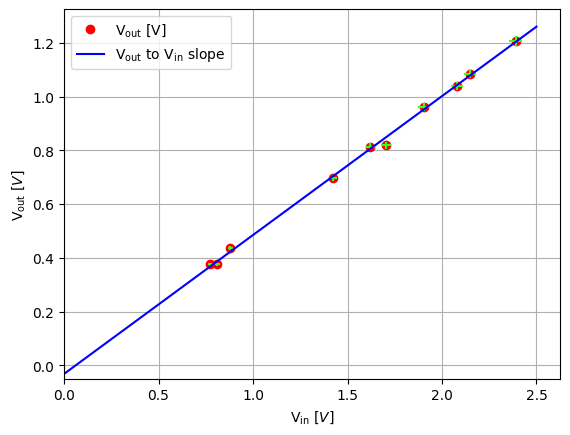

In [70]:
# הצגת הנתונים:
plt.plot(V_in, V_out, 'ro', label=r'$\mathrm{V_{out}\ [V]}$')
plt.errorbar(V_in, V_out, xerr=V_in_err, yerr=V_out_err, linestyle='', ecolor='#39FF14')
plt.xlabel(r'$\mathrm{V_{in}}\ [V]$')
plt.ylabel(r'$\mathrm{V_{out}}\ [V]$')

reg = linregress(V_in, V_out)
slope = reg.slope
intercept = reg.intercept
stderr = reg.stderr
intercept_stderr = reg.intercept_stderr
rvalue = reg.rvalue
#print(f'slope={slope:.3f} stderr={stderr:.3f} intercept={intercept:.3f} intercept_stderr={intercept_stderr:.3f} rvalue={rvalue:.3f}')

lin = np.linspace(0, 2.5, 10)
plt.plot(lin, slope * lin + intercept, 'b-', label=r'$\mathrm{V_{out}\ to\ V_{in}\ slope}$')
plt.legend(loc="upper left")
plt.xlim(left=0)
plt.ylim(bottom=-0.05)
plt.grid()
plt.show()

<div dir=rtl>
חילוץ יחס החלוקה (באמצעות רגרסיה): <br>

<font color="red">
(לא לשכוח להזין בלומדה!)
</font>

In [66]:
# Your code here
print(f'"Theroetical" ratio from resistance measurement: {R_ratio:.3f}')
print(f"Ratio fit from voltage measurements: {reg.slope:.3f}")
print(f"Ratio standard error: {reg.stderr:.3f}")
print(f"R value: {reg.rvalue:.6f}")

from math import hypot
e = hypot((R2/((R1+R2)**2)) * R1_err, (-R1/((R1+R2)**2)) * R2_err)
print(f"Error of theoretical calculation: {e:.3f}")
#theroetical ratio, calculated, error

"Theroetical" ratio from resistance measurement: 0.501
Ratio fit from voltage measurements: 0.517
Ratio standard error: 0.008
R value: 0.999060
Error of theoretical calculation: 0.003


***

In [24]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression


<div dir=rtl>

## DC3 : התנגדות פנימית


| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC3.png" width="150" > | $$V_x = V_g - I R_i $$|

<div dir=rtl>

<b> מדידות: </b> <br>

10 (לפחות) מדידות של המתח על הנגד ($V_{x}$) בערוץ X והזרם במעגל ($I$) במולטימטר:

In [25]:
I = np.array([38.827,37.3,33.946,31.493,30.078,26.694,24.84,22.63,19.874,18.01,16.53,14.68,13.56]) / 1000
Vx = np.array([.499,.577,.747,.871,.943,1.115,1.2,1.32,1.46,1.55,1.62,1.72,1.77])
I_err = I * 0.05 + (100 / 1000) * 0.007
Vx_err = Vx * (1.5 / 100)

<div dir=rtl>

<b> הצגת הנתונים: </b> <br>

In [1]:
plt.plot(I, Vx, 'ro', label=r'$\mathrm{V_{x}\ [V]}$')
plt.errorbar(I, Vx, xerr=I_err, yerr=Vx_err, linestyle='')
plt.xlabel(r'I [A]')
plt.ylabel(r'$\mathrm{V_{x}}\ [V]$')

reg = linregress(I, Vx)
#print(f'slope={slope:.3f} stderr={stderr:.3f} intercept={intercept:.3f} intercept_stderr={intercept_stderr:.3f} rvalue={rvalue:.3f}')

lin = np.linspace(0, max(I)*1.3,200)
plt.plot(lin, reg.slope * lin + reg.intercept, 'g-', linewidth=.5, label=r'$\mathrm{V_{x}\ to\ I\ slope}$')
plt.legend(loc="upper right")

plt.xlim(left=0, right=0.05)
plt.ylim(bottom=0)

plt.grid()
plt.show()

print(f"Ratio fit (R_i) from measurements: {reg.slope:.3f}Ω")
print(f"Internal resistance from measurements: {-reg.slope:.3f}Ω")
print(f"Ratio standard error: {reg.stderr:.3f}")
print(f"Ratio intercept: {reg.intercept:.3f}V")

NameError: name 'plt' is not defined

<div dir=rtl>
חילוץ ההתנגדות הפנימית (באמצעות רגרסיה): <br>

<font color="red">
(לא לשכוח להזין בלומדה!)
</font>

In [27]:
# Your code here

***



In [28]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression

<div dir=rtl>

## DC4 : מחלק זרם
    


| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC4.png" width="150" > | $$I_{out} = I_{in} \frac{R_1}{R_1 + R_2}$$|


<div dir=rtl>
מדידת ערכי הנגדים שנבחרו להרכבת מחלק הזרם (לא לשכוח הערכת שגיאה!):

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המנעו מלבחור נגדים בעלי התנגדות גבוהה
</div>

In [48]:
R1 = 22.325 #
R1_err = R1*(.050/1000) + (0.008/100)*100 #
R2 = 22.194 #
R2_err = R2*(.050/1000) + (0.008/100)*100 #
Rx = 11.053
Rx_err = Rx*(.050/1000) + (0.008/100)*100 #
print(f"{R1=}, {R1_err=}, {R2=}, {R2_err=}, {Rx=}, {Rx_err=}")

R1=22.325, R1_err=0.00911625, R2=22.194, R2_err=0.0091097, Rx=11.053, Rx_err=0.00855265


<div dir=rtl> <b> מדידות: </b> <br>

<div dir=rtl>
10 (לפחות) מדידות של זרם הכניסה ($I$) במולטימטר והמתח על נגד הבוחן ($V_{x}$) בערוץ X:

In [30]:
I_out = np.array([16.039,14.951,14.502,14.054,13.349,12.709,11.940,11.299,10.467,9.301,8.476,7.643,7.002])/1000 #
I_out_err = I * 0.05 + (100 / 1000) * 0.007
V_in = np.array([370.53,345.29,334.70,324.27,307.76,292.81,274.73,254.5,236.1,210.23,191.5,172.34,157.57])/1000 #
I_in = V_in/Rx
I_in_err = I_in * (1.5 / 100)

<div dir=rtl> <b> הצגת הנתונים: </b> <br>

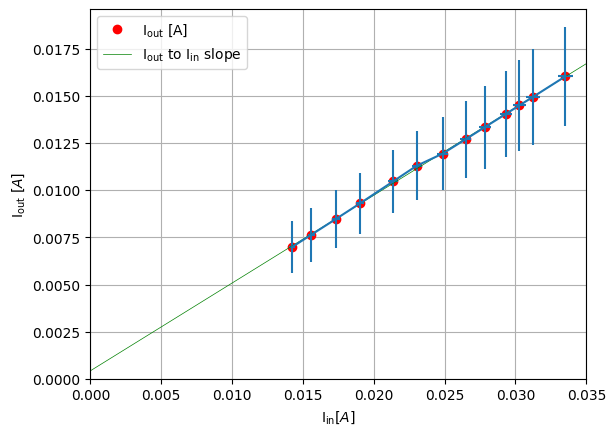

Ratio fit (I_out/I_in) from measurements: 0.465
Ratio standard error: 0.003
Ratio intercept: 0.00043A


In [31]:
plt.plot(I_in, I_out, 'ro', label=r'$\mathrm{I_{out}\ [A]}$')
plt.errorbar(I_in, I_out, xerr=I_in_err, yerr=I_out_err)#, linestyle='')
plt.xlabel(r'$\mathrm{I_{in}} [A]$')
plt.ylabel(r'$\mathrm{I_{out}}\ [A]$')

reg = linregress(I_in, I_out)
# #print(f'slope={slope:.3f} stderr={stderr:.3f} intercept={intercept:.3f} intercept_stderr={intercept_stderr:.3f} rvalue={rvalue:.3f}')

lin = np.linspace(0, max(I_in)*1.1,200)
plt.plot(lin, reg.slope * lin + reg.intercept, 'g-', linewidth=.5, label=r'$\mathrm{I_{out}\ to\ I_{in}\ slope}$')
plt.legend(loc="upper left")

plt.xlim(left=0, right=0.035)
plt.ylim(bottom=0)

plt.grid()
plt.show()

print(f"Ratio fit (I_out/I_in) from measurements: {reg.slope:.3f}")
print(f"Ratio standard error: {reg.stderr:.3f}")
print(f"Ratio intercept: {reg.intercept:.5f}A")

<div dir=rtl>
חילוץ יחס החלוקה (באמצעות רגרסיה): <br>

<font color="red">
(לא לשכוח להזין בלומדה!)
</font>

In [32]:
print(f"Ratio fit (I_out/I_in) from measurements: {reg.slope:.3f}")
print(f"Ratio from resistors measurement: {R1/(R1+R2):.3f}")

Ratio fit (I_out/I_in) from measurements: 0.465
Ratio from resistors measurement: 0.501


<div dir=rtl>
השוואת יחס החלוקה ממדידת הנגדים מול זה שהתקבל מהרגרסיה:


מודפס מעלה


***

In [33]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression

<div dir=rtl>

## DC5 : ספק כוח

| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC5.png" width="150" > | $$R_L = V_{set} / I_{set}$$|

<div dir=rtl>
הגבלות המתח והזרם שהצבנו בספק:

In [34]:
V_set = 1
I_set = 0.103

<div dir=rtl> <b> מדידות: </b> <br>

<div dir=rtl>
20 (לפחות) מדידות של המתח והזרם (ממכשירי המדידה):

In [35]:
I = np.array([1066,1091,1145,1182,1222,1274,1250,1340,1516,1648,1670,1940,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984]) / 10000
V = np.array([978,978,978,978,977,977,977,977,977,977,977,977,927,848,794,688,645,559,476,415,409,375,297,256,166,140,53,13]) / 1000 #
I_err = I * 0.05 + (100 / 1000) * 0.007
V_err = V * (1.5 / 100)
I

array([0.1066, 0.1091, 0.1145, 0.1182, 0.1222, 0.1274, 0.125 , 0.134 ,
       0.1516, 0.1648, 0.167 , 0.194 , 0.1984, 0.1984, 0.1984, 0.1984,
       0.1984, 0.1984, 0.1984, 0.1984, 0.1984, 0.1984, 0.1984, 0.1984,
       0.1984, 0.1984, 0.1984, 0.1984])

<div dir=rtl> <b> הצגת הנתונים: </b> <br>

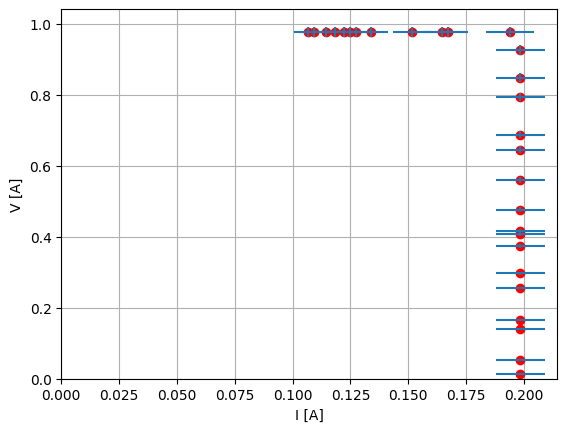

In [36]:
plt.plot(I, V, "ro", label="I [A]")
plt.errorbar(I, V, xerr=I_err, yerr=V_err, linestyle="")
plt.xlabel("I [A]")
plt.ylabel("V [A]")

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.show()

<div dir=rtl>
מה מתאר הגרף?

 ניתן לראות כי הספק עבר למצב CC כאשר הגיע להגבלת הזרם המוגדרת שהיא 2A. הגרף מראה את התנהגות ספק הכוח -- עד נקודת המעבר המתח קבוע והזרם גדל, ואחריה הזרם נשאר קבוע והמתח קטן.

***